# 1.7 第一个应用：鸢尾花(Iris)分类

## 1.7.1 初识数据

In [3]:
# 调用load_iris函数来加载数据
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [4]:
# load_iris返回的iris对象是一个Bunch对象，与字典类似，里面包含键和值
print("Keys of iris_dataset: \n{}".format(iris_dataset.keys()))

Keys of iris_dataset: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [5]:
# DESCR键对应的值是数据集的简要说明。下面给出说明的开头部分
print(iris_dataset['DESCR'][:440] + "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica


...


In [6]:
# target_names键对应的值是一个字符串数组，里面包含的是我们要预测的花的品种
print("Target names: \n{}".format(iris_dataset['target_names']))

Target names: 
['setosa' 'versicolor' 'virginica']


In [7]:
# feature_names键对应的值是一个字符串列表，对每一个特征进行了说明: sepal - 花萼， petal - 花瓣
print("Feature names: \n{}".format(iris_dataset['feature_names']))

Feature names: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [8]:
# 数据包含在target和data字段中。
# data里面是花萼长度、花萼宽带、花瓣长度、花瓣宽带的测量数据，格式是NumPy数组
print("Type of data: {}".format(type(iris_dataset['data'])))

Type of data: <class 'numpy.ndarray'>


In [9]:
# data数组的每一行对应一朵花，列代表每朵花的四个测量数据
print("Shape of data: {}".format(iris_dataset['data'].shape))

Shape of data: (150, 4)


In [10]:
# 上面数组中包含150朵不同的花的测量数据
# 机器学习的个体叫作样本(sample)，其属性叫作特征(feature)，data数组的形状(shape)是样本数乘以特征数。
# 下面是前5个样本的特征数值
print("First 5 rows of data:\n{}".format(iris_dataset['data'][:5]))

First 5 rows of data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [11]:
# target数组包含的是测量过的每朵花的品种，也是一个NumPy数组
print("Type of target: {}".format(type(iris_dataset['target'])))

Type of target: <class 'numpy.ndarray'>


In [12]:
# target是一个一维数组，每朵花对应其中一个数据
print("Shape of target: {}".format(iris_dataset['target'].shape))

Shape of target: (150,)


In [13]:
# 品种被转换为从0到2的整数
print("Target:\n{}".format(iris_dataset['target']))

Target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


上述数字的代表含义由`iris['target_names']`数组给出：
- 0: setosa 丝状
- 1: versicolor 杂色
- 2: virginica 维吉尼亚
（意大利语）

## 1.7.2 衡量模型是否成功：训练数据与测试数据

我们需要用新数据来评估模型的性能。新数据是指模型之前没有见过的数据，而我们有这些新数据的标签。

通常的做法是将收集好的带标签数据（这个鸢尾花数据集是150朵花的测量数据）分成两个部分：
- 一部分数据用于构建机器学习模型，叫作**训练数据(training data)**或**训练集(training set)**
- 其余的数据用来评估模型性能，叫作**测试数据(test data)**、**测试集(test set)**或**留出集(hold-out set)**

scikit-learn中的`train_test_split`函数可以打乱数据集并进行拆分，将75%的行数据及对应标签作为训练集，剩下25%的数据及其标签作为测试集。（训练集和测试集的分配比例可以是随意的，但使用25%的数据作为测试集是很好的经验法则）。

scikit-learn中的数据通常用大写的`X`表示，而标签用小写的`y`表示。这是受到了数学标准公式`f(x)=y`的启发，其中`X`是函数的输入，`y`是输出。

我们用大写的`X`是因为数据是一个二维数组（矩阵），用小写的`y`是因为目标是一个一维数组（向量）。

In [14]:
# 对数据调用train_test_split，并对输出结果采用如下命名方法：
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0)

In [15]:
# train_test_split函数的输出为X_train, X_test, y_train, y_test，它们都是NumPy数组。
# X_train包含75%的行数据，X_test包含剩下的25%
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (112, 4)
y_train shape: (112,)
X_test shape: (38, 4)
y_test shape: (38,)


## 1.7.3 要事第一：观察数据

构建机器学习模型前，观察检查数据以实现：
- 看看如果不用机器学习能不能轻松完成任务
- 需要的信息有没有包含在数据中
- 帮助发现异常值和特殊值

检查数据的最佳方法之一就是将其可视化，一种可视化方法是绘制散点图(scatter plot)，但一次只能绘制两个特征，解决此问题的一种方法是绘制**散点图矩阵(pair plot)**，从而可以两两查看所有的特征。

In [16]:
# 下面是训练集X_train中特征的散点图矩阵。
# 数据点的颜色与鸢尾花的品种相对应。
# 首先将NumPy数组转换成pandas dataframe，再利用pandas的scatter_matrix函数绘制散点图矩阵。矩阵对角线是每个特征的直方图
import pandas as pd
import mglearn
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
grr = pd.scatter_matrix(iris_dataframe, c=y_train, figsize=(15,15), marker='o', hist_kwds={'bins':20}, s=60, alpha=.8, cmap=mglearn.cm3)

AttributeError: module 'pandas' has no attribute 'scatter_matrix'

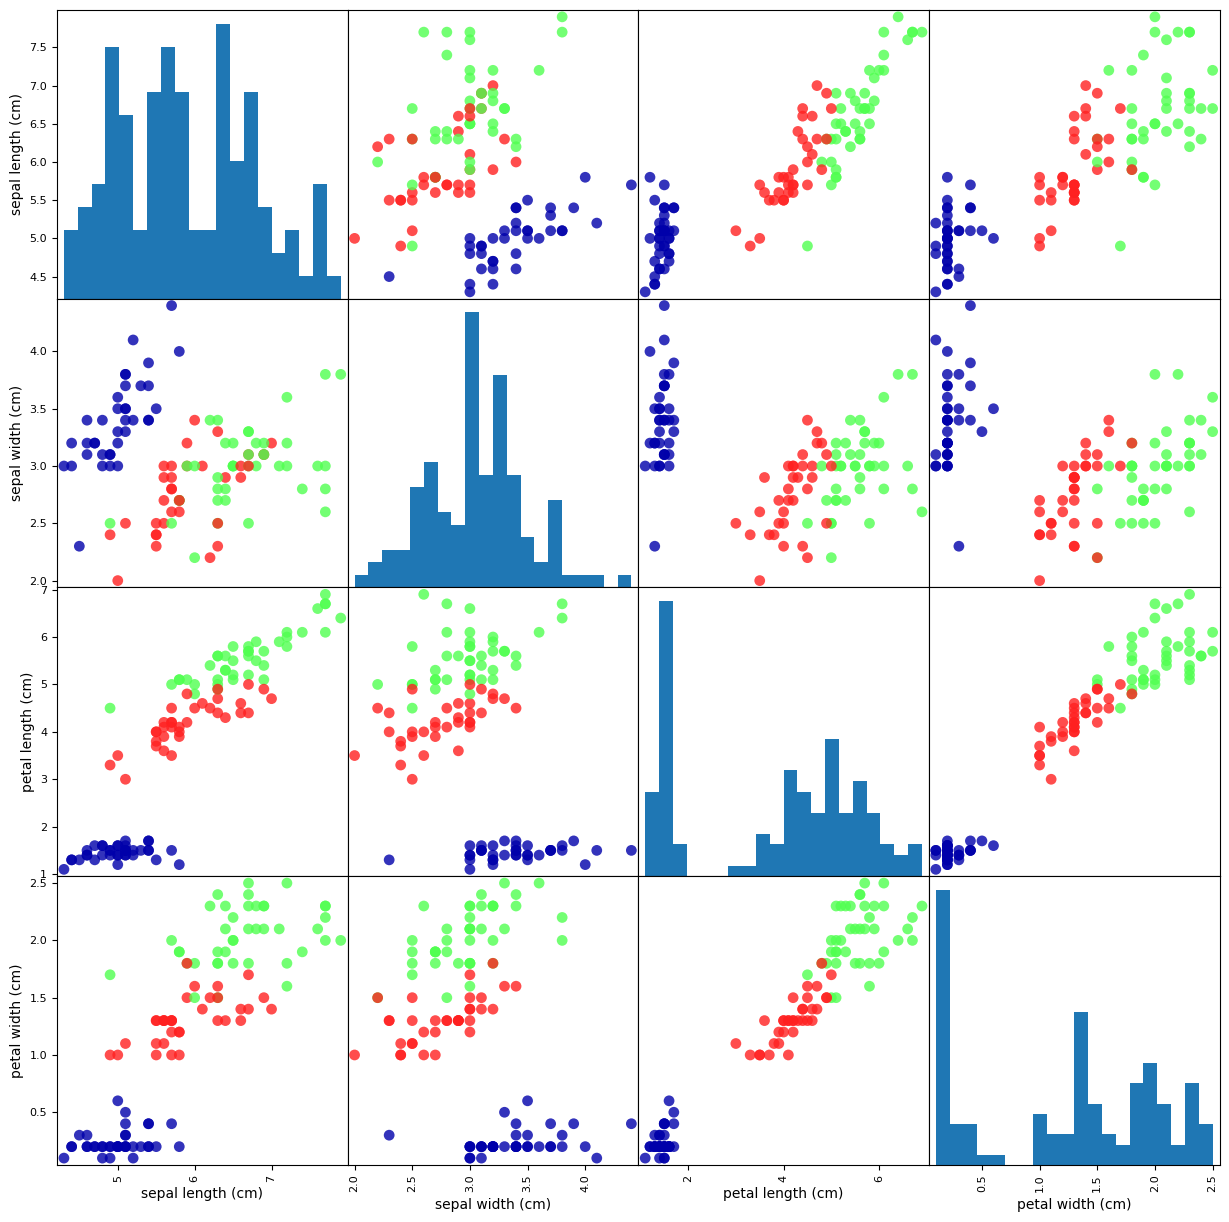

In [17]:
# 在较新版本的 Pandas 中，scatter_matrix 函数已经从顶级模块 pd 移动到了 pd.plotting 子模块下。
# 解决方法: 只需要将 pd.scatter_matrix 修改为 pd.plotting.scatter_matrix 即可。
grr = pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15,15), marker='o', hist_kwds={'bins':20}, s=60, alpha=.8, cmap=mglearn.cm3)

上图可以看出，利用花瓣和花萼的测量数据基本可以将三个类别区分开，即说明机器学习模型很可能可以学会区分它们。

## 1.7.4 构建第一个模型：k近邻算法

k近邻分类器：要对一个新的数据点做出预测，算法会在训练集中寻找与这个新数据点距离最近的数据点，然后将找到的数据点的标签赋值给新数据点。

k近邻算法中`k`的含义是：我们可以考虑训练集中与新数据点最近的任意k个邻居（如距离最近的3个或5个邻居），而不是只考虑最近的那一个。然后，我们可以用这些邻居中数量最多的类别做出预测。

scikit-learn中所有的机器学习模型都在各自的类中实现，这些类被称为`Estimator`类。

k近邻分类算法是在`neighbors`模块的`KNeighborsClassifier`类中实现的。

要使用此模型，需要将这个类实例化为一个对象，并设置模型的参数。`KNeighborsClassifier`最重要的参数就是邻居的数目，此处我们设为1，如下：

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

`knn`对象对算法进行了封装，既包括用训练数据构建模型的算法，也包括对新数据点进行预测的算法，还包括从训练数据中提取的信息。

对`KNeighborsClassifier`来说，里面只保存了训练集。想要基于训练集来构建模型，需要调用`knn`对象的`fit`方法，输入参数为`X_train`和`y_train`，二者都是NumPy数组，前者包含训练数据，后者包含相应的训练标签，如下：

In [21]:
knn.fit(X_train, y_train)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",1
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None
